# Lec 04 October 2024

In [1]:
import tensorflow as tf
import keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# importing ANN using MNIST dataset

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [5]:
print(train_images.ndim) # 3D tensor
print(train_labels)

3
[5 0 4 ... 5 6 8]


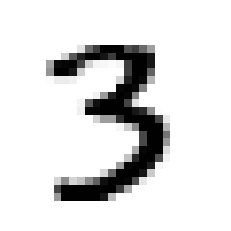

In [6]:
# let's retrieve imaages
digit = train_images[10000]

plt.imshow(digit, cmap = plt.cm.binary)
plt.axis('off')
plt.show()

In [7]:
# slicing
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [8]:
# data batches: break the data into a smaller batches
# assume the batch size of 128

n = 2
batch = train_images[128*n : 128*(n+1)]
print(batch.shape)

(128, 28, 28)


In [9]:
train_images, test_images = train_images/255.0, test_images/255.0

In [10]:
# Build NN
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation = 'softmax') # used for classification
])

In [11]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', # best for categorical
              metrics = ['accuracy'])

In [12]:
r = model.fit(train_images, train_labels,
              validation_data=(test_images, test_labels),
              epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8903 - loss: 0.3674 - val_accuracy: 0.9668 - val_loss: 0.1077
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9689 - loss: 0.0989 - val_accuracy: 0.9728 - val_loss: 0.0873
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9792 - loss: 0.0669 - val_accuracy: 0.9772 - val_loss: 0.0719
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9818 - loss: 0.0532 - val_accuracy: 0.9788 - val_loss: 0.0677
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0410 - val_accuracy: 0.9806 - val_loss: 0.0707
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9893 - loss: 0.0320 - val_accuracy: 0.9799 - val_loss: 0.0707
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9901 - loss: 0.0291 - val_accuracy: 0.9823 - val_loss: 0.0643
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9918 - loss: 0.0246 - 

In [13]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 0.0813


[0.07135613262653351, 0.9815000295639038]

In [26]:
from sklearn.metrics import confusion_matrix
import itertools

In [41]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmaps=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("normalized confusion matrix")
    else:
        print("Confusion matrix")
    
    print(cm)

    # plotting
    plt.imshow(cm, interpolation='nearest', cmap=cmaps)
    plt.title('Title')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # formatting matrix values
    fmt='.2f' if normalize else 'd'

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('true')
    plt.xlabel('predicted')
    plt.show()

In [37]:
p_test = model.predict(test_images).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [53]:
cm = confusion_matrix(test_labels, p_test)
print(cm)

# calculate the total number of correct predictions
correct_prediction = np.trace(cm)
print(correct_prediction)

# calculate the total number of samples
total_N = np.sum(cm)
print(total_N)

# calculate accuracy
accuracy = correct_prediction/total_N
print(f"accuracy: {accuracy}")

[[ 973    1    1    0    1    1    1    1    1    0]
 [   0 1125    1    1    0    0    2    2    4    0]
 [   1    1 1022    2    1    0    1    3    1    0]
 [   0    0    5  988    0    5    0    5    0    7]
 [   0    0    4    0  968    0    2    2    0    6]
 [   2    0    0    4    2  880    3    0    1    0]
 [   3    2    1    1    3    7  940    0    1    0]
 [   1    0    6    1    0    0    0 1013    3    4]
 [   5    0   10    4    4    4    3    3  936    5]
 [   1    3    0    4   16    5    1    7    2  970]]
9815
10000
accuracy: 0.9815


Confusion matrix
[[ 973    1    1    0    1    1    1    1    1    0]
 [   0 1125    1    1    0    0    2    2    4    0]
 [   1    1 1022    2    1    0    1    3    1    0]
 [   0    0    5  988    0    5    0    5    0    7]
 [   0    0    4    0  968    0    2    2    0    6]
 [   2    0    0    4    2  880    3    0    1    0]
 [   3    2    1    1    3    7  940    0    1    0]
 [   1    0    6    1    0    0    0 1013    3    4]
 [   5    0   10    4    4    4    3    3  936    5]
 [   1    3    0    4   16    5    1    7    2  970]]


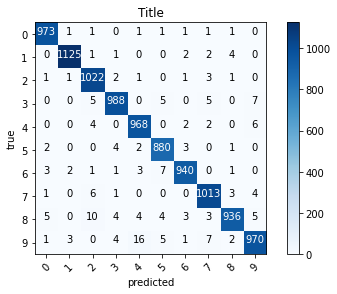

In [54]:
plot_confusion_matrix(cm, list(range(10)), normalize=False)

normalized confusion matrix
[[9.92857143e-01 1.02040816e-03 1.02040816e-03 0.00000000e+00
  1.02040816e-03 1.02040816e-03 1.02040816e-03 1.02040816e-03
  1.02040816e-03 0.00000000e+00]
 [0.00000000e+00 9.91189427e-01 8.81057269e-04 8.81057269e-04
  0.00000000e+00 0.00000000e+00 1.76211454e-03 1.76211454e-03
  3.52422907e-03 0.00000000e+00]
 [9.68992248e-04 9.68992248e-04 9.90310078e-01 1.93798450e-03
  9.68992248e-04 0.00000000e+00 9.68992248e-04 2.90697674e-03
  9.68992248e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.95049505e-03 9.78217822e-01
  0.00000000e+00 4.95049505e-03 0.00000000e+00 4.95049505e-03
  0.00000000e+00 6.93069307e-03]
 [0.00000000e+00 0.00000000e+00 4.07331976e-03 0.00000000e+00
  9.85743381e-01 0.00000000e+00 2.03665988e-03 2.03665988e-03
  0.00000000e+00 6.10997963e-03]
 [2.24215247e-03 0.00000000e+00 0.00000000e+00 4.48430493e-03
  2.24215247e-03 9.86547085e-01 3.36322870e-03 0.00000000e+00
  1.12107623e-03 0.00000000e+00]
 [3.13152401e-03 2.08768267e-0

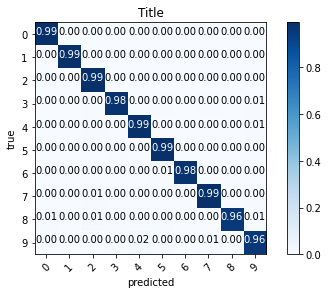

In [55]:
plot_confusion_matrix(cm, list(range(10)), normalize=True)

In [57]:
# What types of images made a misclassification?
mis_IDs = np.where(p_test != test_labels)[0]
print(mis_IDs.shape)
print(mis_IDs)

(185,)
[ 217  247  321  359  381  445  495  582  659  691  720  740  813  846
  877  882  947  951  956  965 1003 1014 1101 1112 1130 1156 1226 1232
 1242 1247 1319 1328 1393 1395 1414 1494 1530 1549 1553 1569 1621 1678
 1681 1717 1878 1901 1941 1982 2004 2018 2040 2053 2070 2109 2135 2272
 2293 2387 2414 2426 2488 2560 2582 2597 2648 2654 2720 2845 2863 2877
 2915 2921 2927 2939 2953 2975 3284 3289 3405 3422 3441 3503 3520 3558
 3559 3727 3762 3808 3818 3821 3850 3853 3869 3893 3906 3926 3941 3943
 3985 4065 4078 4140 4163 4176 4199 4201 4207 4224 4248 4294 4306 4497
 4500 4534 4536 4601 4639 4731 4740 4761 4807 4823 4838 4879 4880 4956
 4990 5331 5457 5495 5586 5642 5676 5734 5757 5936 5937 5955 5973 6011
 6023 6024 6045 6059 6166 6359 6555 6571 6574 6597 6617 6641 6651 6755
 6783 6784 6847 7208 7259 7800 7821 7899 7928 8246 8316 8408 8522 8527
 9009 9015 9024 9587 9634 9664 9679 9729 9745 9749 9770 9792 9793 9839
 9856 9858 9944]


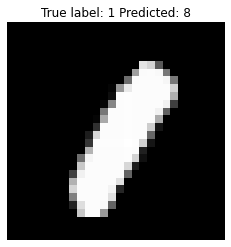

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly select an index from test_images
i = np.random.choice(mis_IDs)

# Display the image
plt.imshow(test_images[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (test_labels[i], p_test[i]))
plt.axis('off')  # Optional: Hide axis for better visualization
plt.show()


# ANN Regression

In [132]:
from mpl_toolkits.mplot3d import Axes3D # for 3d plotting

In [136]:
# generate the data
N = 1000
X = np.random.random((N, 2))*6 - 3
Y = np.cos(2*X[:,0])+np.cos(3*X[:,1])
print(X.shape)
print(Y.shape)


(1000, 2)
(1000,)


$$y = cos(2x_1) + cos(3x_2) $$

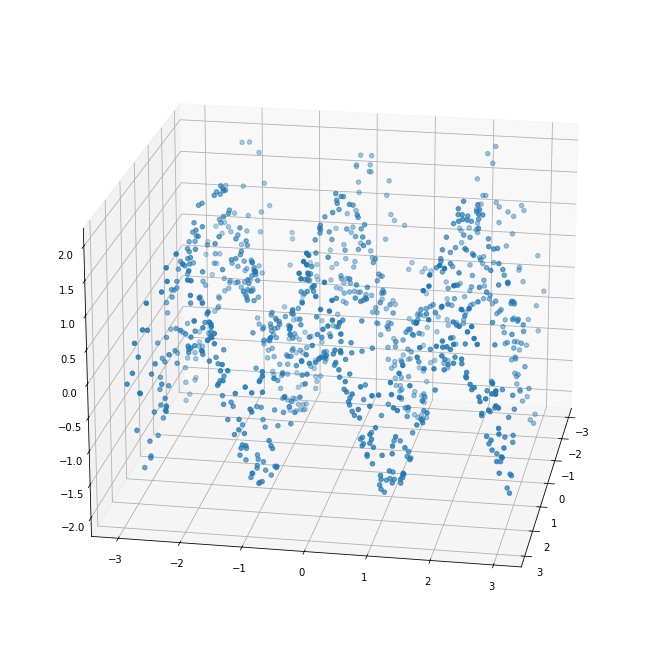

In [147]:
# visualize the data
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], Y)

# rotate the plot for better view
ax.view_init(elev = 20, azim = 10)
plt.show()

In [170]:
# build NN
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2, ), activation='relu'),
    tf.keras.layers.Dense(1)
])


c:\Users\ntlmp\AppData\Local\R-MINI~1\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [171]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mse')


In [172]:
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0725   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9192 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.8688
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8718 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8512 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.7758
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7314 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6389 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.7068
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.5969
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.6098
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.6130
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5399 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5833
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/s

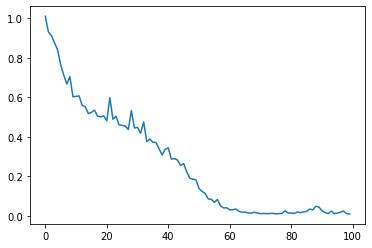

In [173]:
plt.plot(r.history['loss'], label='loss')